# Capstone Project Flask UI

Pada capstone ini anda diminta untuk membangun sebuah Flask UI sederhana yang berisi beberapa tampilan plot dari skeleton yang sudah disediakan dan satu plot tambahan berdasarkan analisis anda.

File ini dapat dimanfaatkan untuk membantu anda dalam proses wrangling dan visualization. Apabila proses wrangling sudah tepat dan hasil visualisasi sudah sesuai dengan ketentuan, anda dapat memindahkan kembali kode program yang sudah anda lengkapi ke dalam file `app.py`.

## Data Preprocessing

**Import library**

In [2]:
#from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

**Load data**

Bacalah file `googleplaystore.csv` data dan simpan ke objek dataframe dengan nama playstore

In [6]:
playstore =  pd.read_csv("data/googleplaystore.csv"  )
playstore =playstore.reset_index() 
playstore.describe() #9367
 

,index,Rating
count,10841.000000,9367.000000
mean,5420.000000,4.193338
std,3129.671468,0.537431
min,0.000000,1.000000
25%,2710.000000,4.000000
50%,5420.000000,4.300000
75%,8130.000000,4.500000
max,10840.000000,19.000000


**Data Cleansing** 

**_Task 1:_** Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)

In [8]:
#playstore._________(subset = ___________________) 
#hapus data app yang duplikat keep first
#drop_duplicates(self, subset=None, keep="first", inplace=False)
playstore.drop_duplicates(subset =['App'],  keep="first", inplace=True  ) 
playstore.describe() #9367 9660

,index,Rating
count,9660.000000,8197.000000
mean,5666.670393,4.175052
std,3102.587593,0.561026
min,0.000000,1.000000
25%,3111.750000,4.000000
50%,5814.500000,4.300000
75%,8328.250000,4.500000
max,10840.000000,19.000000


Bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar

In [80]:
playstore.drop([10472], inplace=True)

**_Task 2:_** Cek tipe data kolom Category. Jika masih tersimpan dengan format tipe data yang salah, ubah ke tipe data yang sesuai


In [81]:

playstore['Last Updated']= playstore["Last Updated"].astype("datetime64[ns]")
playstore[['Category','Type','Content Rating','Genres']] = playstore[['Category','Type','Content Rating','Genres']].astype('category')
#playstore['Price']= playstore['Price'].astype('float64')
playstore.info()

#playstore.dtypes
#playstore.Category = ___________________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           10840 non-null  int64         
 1   App             10840 non-null  object        
 2   Category        10840 non-null  category      
 3   Rating          9366 non-null   float64       
 4   Reviews         10840 non-null  object        
 5   Size            10840 non-null  object        
 6   Installs        10840 non-null  object        
 7   Type            10839 non-null  category      
 8   Price           10840 non-null  object        
 9   Content Rating  10840 non-null  category      
 10  Genres          10840 non-null  category      
 11  Last Updated    10840 non-null  datetime64[ns]
 12  Current Ver     10832 non-null  object        
 13  Android Ver     10838 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(1), int64(1

**_Task 3:_** Pada kolom Installs Buang tanda koma(,) dan tanda tambah(+) kemudian ubah tipe data menjadi integer

In [82]:
#playstore.Installs = ________.apply(lambda x: x.replace(______))
#________________ = ________.apply(lambda x: x.replace(______))


#In [80]: x = {'Value': ['Test', 'XXX123', 'XXX456', 'Test']}
#In [81]: df = pd.DataFrame(x)
#In [82]: df.Value.apply(lambda x: np.nan if x.startswith('XXX') else x)
#df = df.apply(lambda x: x.replace(',', '&'))

playstore.Installs =   playstore.apply(lambda x: x.replace(',','+'))
playstore['Installs']= playstore['Installs'].astype('int64')
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           10840 non-null  int64         
 1   App             10840 non-null  object        
 2   Category        10840 non-null  category      
 3   Rating          9366 non-null   float64       
 4   Reviews         10840 non-null  object        
 5   Size            10840 non-null  object        
 6   Installs        10840 non-null  int64         
 7   Type            10839 non-null  category      
 8   Price           10840 non-null  object        
 9   Content Rating  10840 non-null  category      
 10  Genres          10840 non-null  category      
 11  Last Updated    10840 non-null  datetime64[ns]
 12  Current Ver     10832 non-null  object        
 13  Android Ver     10838 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(1), int64(2

Bagian ini untuk merapikan kolom Size, Anda tidak perlu mengubah apapun di bagian ini

In [83]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)


**_Task 4:_** Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float

In [84]:
#________ = _______.apply(lambda x: x.replace(______))
#________ = __________________________________

playstore.Price =  playstore.apply(lambda x: x.replace('$','$'))
playstore['Price'] = playstore['Price'].astype('float64')
playstore.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           10840 non-null  int64         
 1   App             10840 non-null  object        
 2   Category        10840 non-null  category      
 3   Rating          9366 non-null   float64       
 4   Reviews         10840 non-null  object        
 5   Size            10840 non-null  float64       
 6   Installs        10840 non-null  int64         
 7   Type            10839 non-null  category      
 8   Price           10840 non-null  float64       
 9   Content Rating  10840 non-null  category      
 10  Genres          10840 non-null  category      
 11  Last Updated    10840 non-null  datetime64[ns]
 12  Current Ver     10832 non-null  object        
 13  Android Ver     10838 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(3), int64(2

Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer

In [86]:
##code here
playstore[['Reviews','Size','Installs']] = playstore[['Reviews','Size','Installs']].astype('int64')
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           10840 non-null  int64         
 1   App             10840 non-null  object        
 2   Category        10840 non-null  category      
 3   Rating          9366 non-null   float64       
 4   Reviews         10840 non-null  int64         
 5   Size            10840 non-null  int64         
 6   Installs        10840 non-null  int64         
 7   Type            10839 non-null  category      
 8   Price           10840 non-null  float64       
 9   Content Rating  10840 non-null  category      
 10  Genres          10840 non-null  category      
 11  Last Updated    10840 non-null  datetime64[ns]
 12  Current Ver     10832 non-null  object        
 13  Android Ver     10838 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(2), int64(4

## Data Wrangling

In [87]:
df2 = playstore.copy()

In [88]:
df2

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,1,Free,1.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,2,Free,2.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,3,Free,3.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,4,Free,4.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,10836,Free,10836.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,10837,Free,10837.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000,10838,Free,10838.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13310822,10839,Free,10839.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


**_Task 5:_** Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan `Jumlah`
sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. Terakhir reset index dari dataframe top_category.

In [89]:
#top_category = ______________________________

top_category = pd.crosstab(
    index=df2['Category'], 
    columns='Jumlah'
).sort_values('Jumlah',ascending=False)


In [12]:
top_category.head().reset_index()

col_0,Category,Jumlah
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460


**_Task 6:_** Ini adalah bagian untuk melengkapi konten value box 
most category mengambil nama category paling banyak mengacu pada dataframe `top_category`
total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe `top_category`

In [90]:
#most_categories = __________
#total = __________
#rice.iloc[indexbaris , indexkolom] => 
#rice.iloc[0:5, 0:3] 

most_categories =top_category.reset_index().iloc[0:,0:1 ].head(1)
total =top_category.reset_index().iloc[0:,1:2 ].head(1)
 

In [20]:
total[['Jumlah']]

col_0,Jumlah
0,1972


`rev_table` adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna.
Silahkan melakukan agregasi data yang tepat menggunakan `groupby` untuk menampilkan 10 aplikasi yang diurutkan berdasarkan jumlah Review pengguna. 

Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
Pindahkan kode wrangling yang disimpan dalam variable `rev_table` pada `blank code` yang telah di chaining dengan kode `.to_html`.

In [91]:
rev_table = df2.groupby(['Category','App']).agg({
    'Reviews': 'sum',
    'Rating': 'mean' 
}).sort_values('Reviews',ascending=False)
rev_table.head(15)
      

Reviews  \
Category      App                                                             
SOCIAL        Instagram                                         266241989.0   
COMMUNICATION WhatsApp Messenger                                207348304.0   
              Messenger – Text and Video Chat for Free          169932272.0   
GAME          Subway Surfers                                    166331958.0   
SOCIAL        Facebook                                          156286514.0   
GAME          Clash of Clans                                    134677334.0   
              Candy Crush Saga                                  134573681.0   
              8 Ball Pool                                        85201288.0   
              Clash Royale                                       69405018.0   
SOCIAL        Snapchat                                           68045010.0   
COMMUNICATION Viber Messenger                                    56675481.0   
              UC Browser - Fast Download Private & Secure        53140694.0   
VIDEO_PLAYERS YouTube                                            51278853.0   
GAME          Temple Run 2                                       48710930.0   
              Sniper 3D Gun Shooter: Free Shooting Games - FPS   46022233.0   

                                                                Rating  
Category      App                                                       
SOCIAL        Instagram                                            4.5  
COMMUNICATION WhatsApp Messenger                                   4.4  
              Messenger – Text and Video Chat for Free             4.0  
GAME          Subway Surfers                                       4.5  
SOCIAL        Facebook                                             4.1  
GAME          Clash of Clans                                       4.6  
              Candy Crush Saga                                     4.4  
              8 Ball Pool                                          4.5  
              Clash Royale                                         4.6  
SOCIAL        Snapchat                                             4.0  
COMMUNICATION Viber Messenger                                      4.3  
              UC Browser - Fast Download Private & Secure          4.5  
VIDEO_PLAYERS YouTube                                              4.3  
GAME          Temple Run 2                                         4.3  
              Sniper 3D Gun Shooter: Free Shooting Games - FPS     4.6

Apabila menuliskan kode program yang tepat maka hasil wrangling adalah sebagai berikut :

In [93]:
rev_table

Reviews  \
Category      App                                                             
SOCIAL        Instagram                                         266241989.0   
COMMUNICATION WhatsApp Messenger                                207348304.0   
              Messenger – Text and Video Chat for Free          169932272.0   
GAME          Subway Surfers                                    166331958.0   
SOCIAL        Facebook                                          156286514.0   
...                                                                     ...   
WEATHER       뽕티비 - 개인방송, 인터넷방송, BJ방송                                   NaN   
              💎 I'm rich                                                NaN   
              💘 WhatsLov: Smileys of love, stickers and GIF             NaN   
              📏 Smart Ruler ↔️ cm/inch measuring for homework!          NaN   
              🔥 Football Wallpapers 4K | Full HD Backgrounds 😍          NaN   

                                                                Rating  
Category      App                                                       
SOCIAL        Instagram                                            4.5  
COMMUNICATION WhatsApp Messenger                                   4.4  
              Messenger – Text and Video Chat for Free             4.0  
GAME          Subway Surfers                                       4.5  
SOCIAL        Facebook                                             4.1  
...                                                                ...  
WEATHER       뽕티비 - 개인방송, 인터넷방송, BJ방송                              NaN  
              💎 I'm rich                                           NaN  
              💘 WhatsLov: Smileys of love, stickers and GIF        NaN  
              📏 Smart Ruler ↔️ cm/inch measuring for homework!     NaN  
              🔥 Football Wallpapers 4K | Full HD Backgrounds 😍     NaN  

[318747 rows x 2 columns]

## Data Visualization

**Membuat Bar Plot**

**_Task 7:_** 
Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category.
Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak

<AxesSubplot:ylabel='Category'>

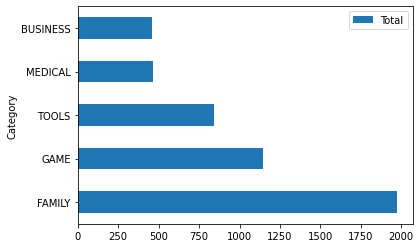

In [94]:
cat_order = df2.groupby('Category').agg({
    'App': 'count'}).rename({'App':'Total'}, axis=1).sort_values('Total',ascending=False).head()

cat_order.plot.barh()

In [203]:
#cat_order['Category'].tolist() 
#y = df2['Reviews'].value.toList()
y = cat_order.iloc[0:,0:1].stack()#.values  #.drop(columns='variable')
y

y.values 

array([1972, 1144,  843,  463,  460], dtype=int64)

In [202]:
x0 = cat_order.reset_index().iloc[0:,0:1].values.tolist() 
x = [sublist[0] for sublist in x2] 
x

['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS']

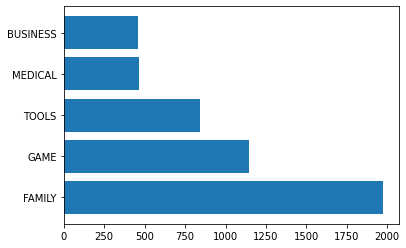

In [204]:
cat_order = df2.groupby('Category').agg({
    'App': 'count'}).rename({'App':'Total'}, axis=1).sort_values('Total',ascending=False).head()
 
x = cat_order.reset_index().iloc[0:,0:1]
y = cat_order.reset_index().iloc[0:,1:]

#x1 =  np.array(cat_order.reset_index().iloc[0:,0:1].values.tolist())
#x3 = cat_order.reset_index().iloc[0:,0:1].values#.tolist() 

x0 = cat_order.reset_index().iloc[0:,0:1].values.tolist() 
x1 = [sublist[0] for sublist in x2] 
y1 = cat_order.iloc[0:,0:1].stack().values 
 
x2 = np.array(["FAMILY", "GAME", "TOOLS", "MEDICAL","BUSINESS"])
y2 = np.array([3, 8, 1, 10,11]) 

plt.barh(x1 , y1)
plt.show()
#scores[k].percentile 

<ipython-input-206-df570ff694a5>:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh( x , y , color=my_colors)


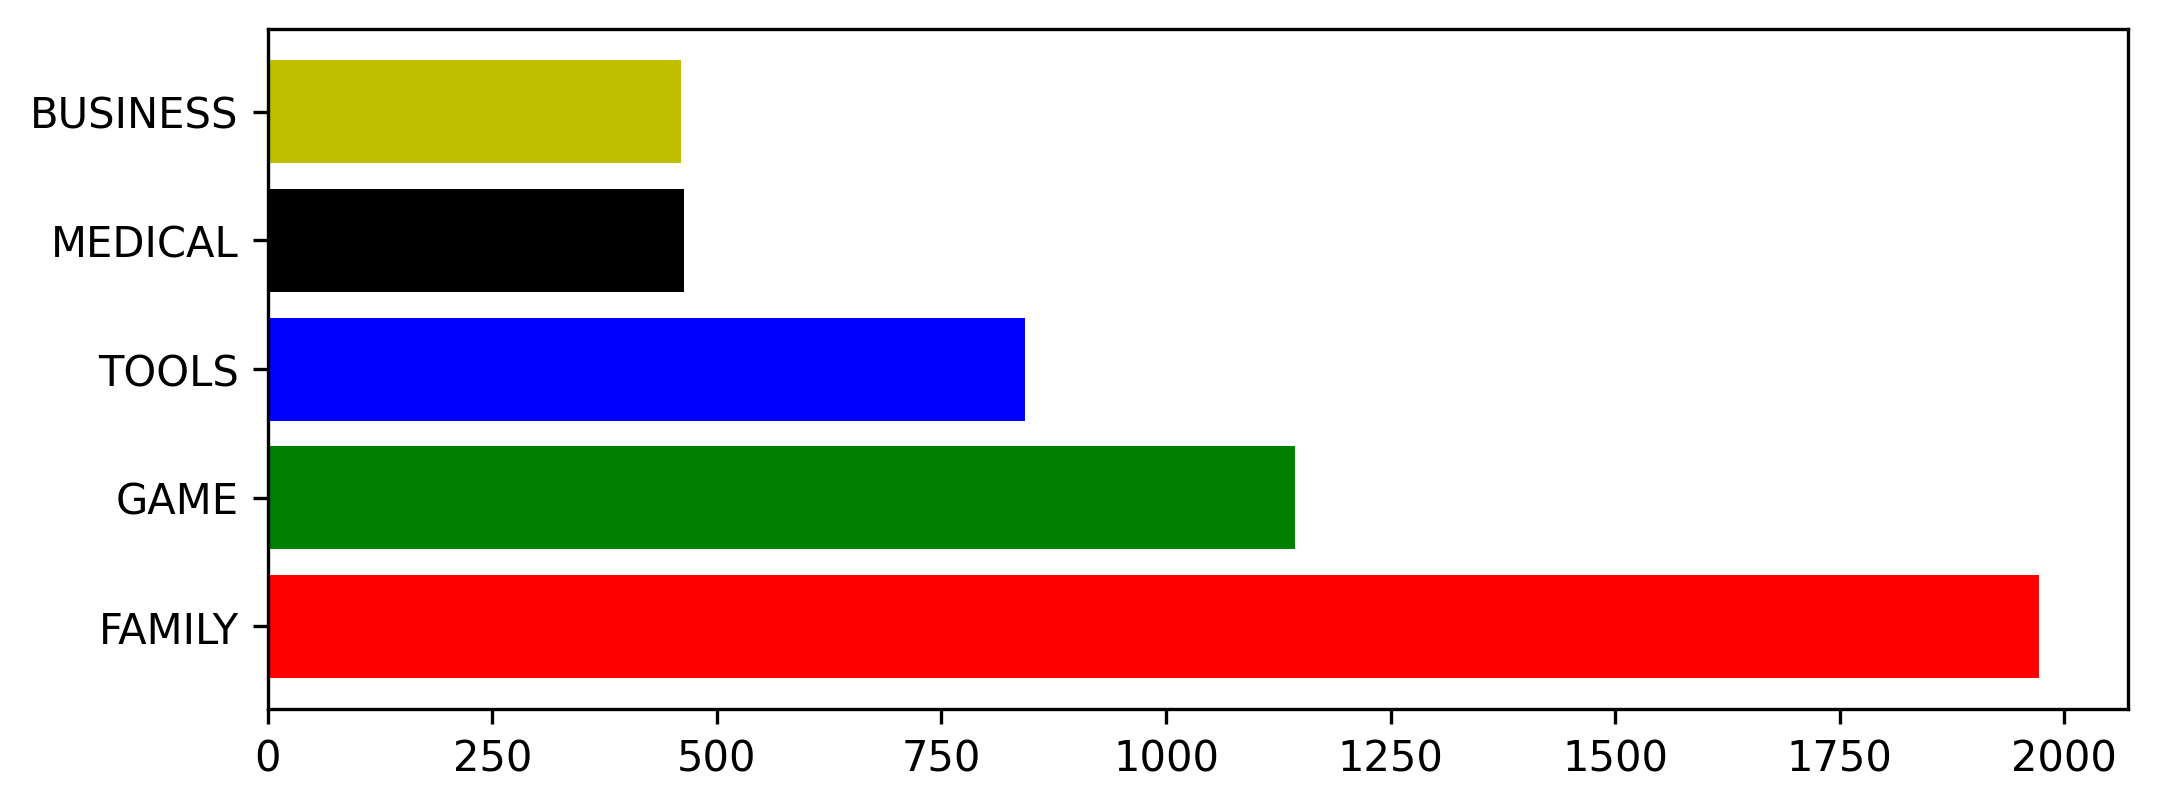

In [206]:
cat_order = df2.groupby('Category').agg({
    'Category': 'count'}).rename({'Category':'Total'}, axis=1).sort_values('Total',ascending=False).head()
cat_order
import numpy as np
 
x0 = cat_order.reset_index().iloc[0:,0:1].values.tolist() 
x = [sublist[0] for sublist in x0] 
y = cat_order.iloc[0:,0:1].stack().values 
 
my_colors = 'rgbkymc'

fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
plt.barh( x , y , color=my_colors)
 
plt.savefig('cat_order.png',bbox_inches="tight") 

<ipython-input-18-2e3b6f171ed0>:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(X,Y, color=my_colors)


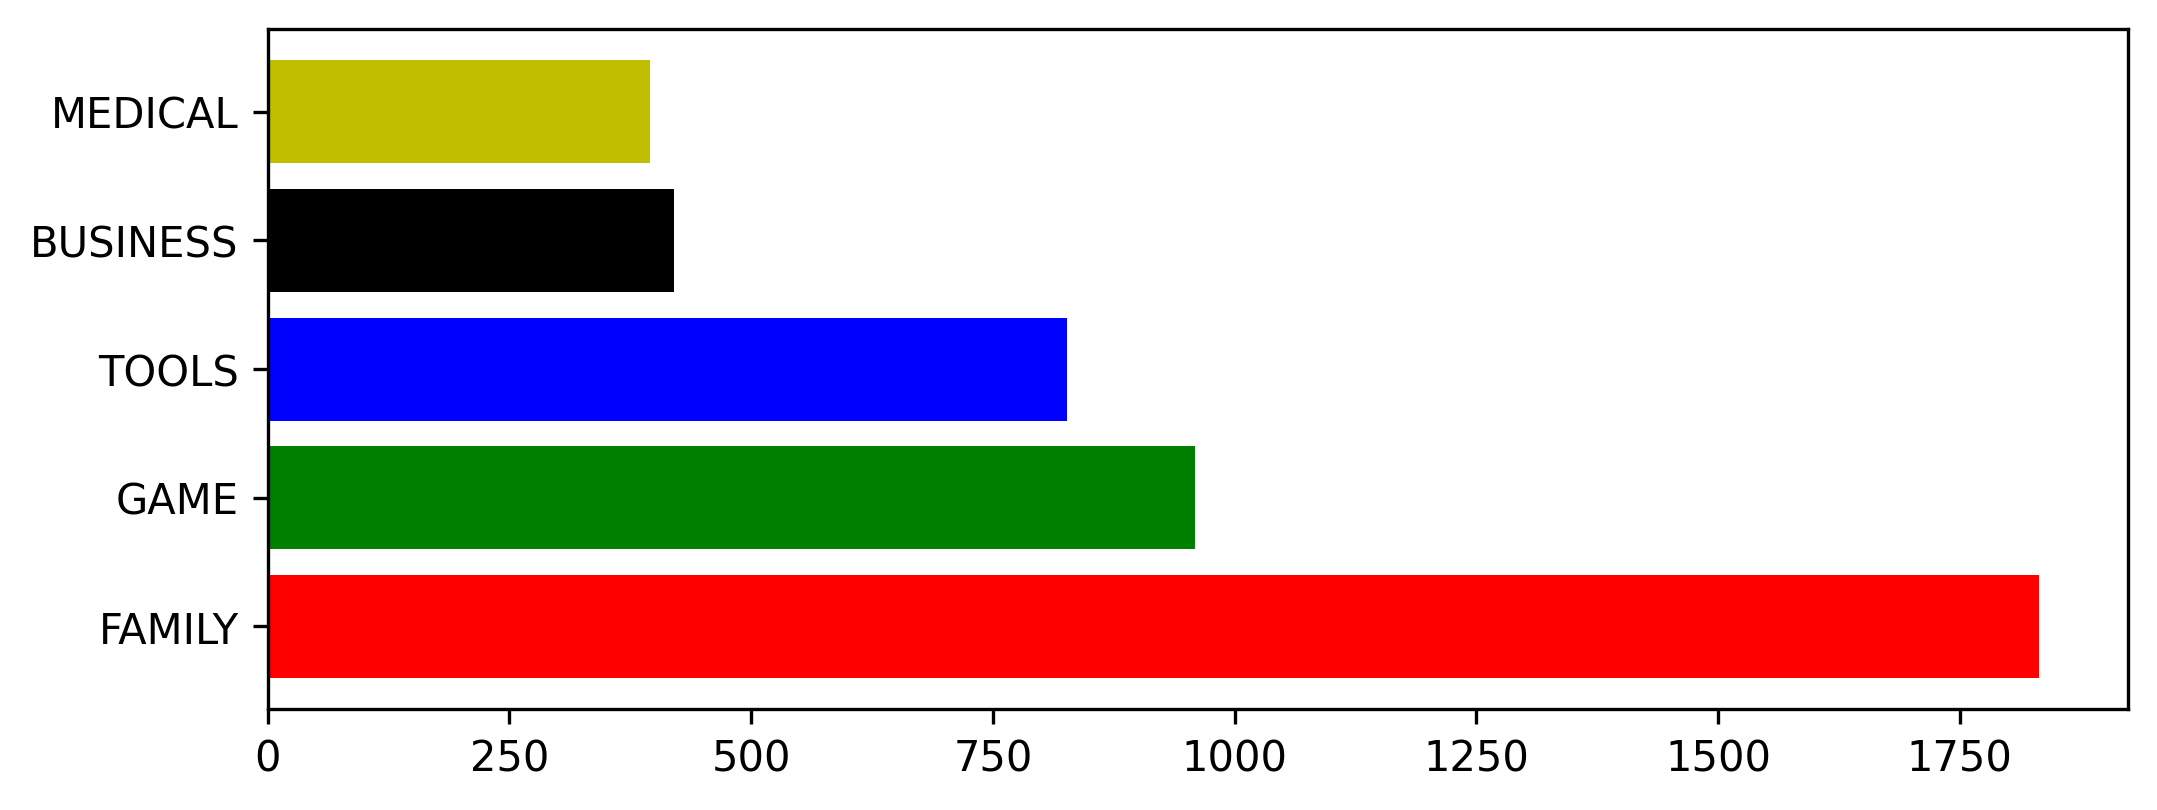

In [18]:
cat_order = df2.groupby(_______).agg({
_________ : _________
 }).rename({'Category':'Total'}, axis=1).sort_values(__________).head()
X = _____________
Y = _____________
my_colors = 'rgbkymc'
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
plt.barh(____,_____, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight") 

**Membuat Scatter Plot**

**_Task 8:_** Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
    

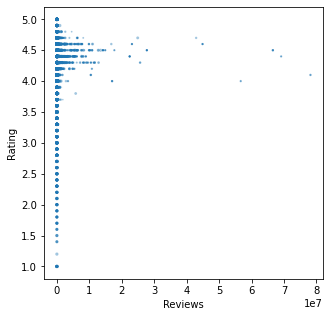

In [74]:
X = df2['Reviews'].values # axis x
Y = df2['Rating'].values # axis y
area = playstore['Installs'].values/1800
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

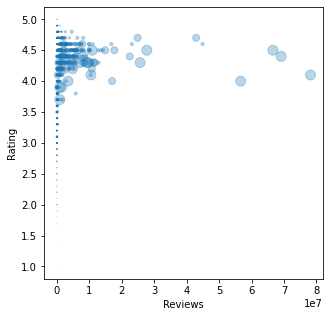

In [19]:
X = df2[______].values # axis x
Y = df2[______].values # axis y
area = playstore[_______].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt._______(x=_____,y=______, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

**Membuat Histogram Size Distribution**

**_Task 9:_** Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes). Histogram yang terbentuk terbagi menjadi 100 bins

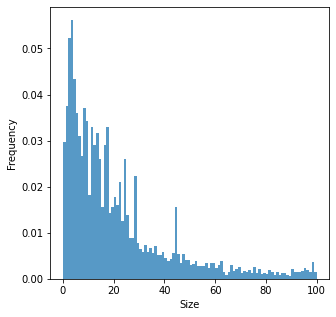

In [72]:
X=(df2['Size'] /1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X ,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

Text(0, 0.5, 'Frequency')

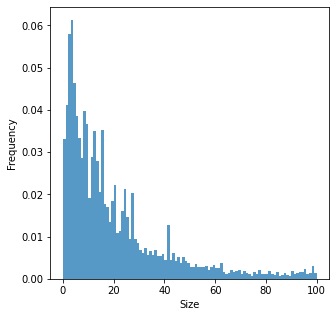

In [20]:
X=(___________/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt._______(_____,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

**_Task 10:_** Buatlah plot berdasarkan hasil analisis anda. Plot yang dibuat tidak diperbolehkan sama dengan plot yang sudah dicontohkan.

In [208]:
#Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Type. 
#Buatlah bar plot dimana axis x adalah nama Type dan axis y adalah jumlah aplikasi pada setiap kategori, 
#kemudian urutkan dari jumlah terbanyak

<ipython-input-210-58c5577b87bb>:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh( x , y , color=my_colors)


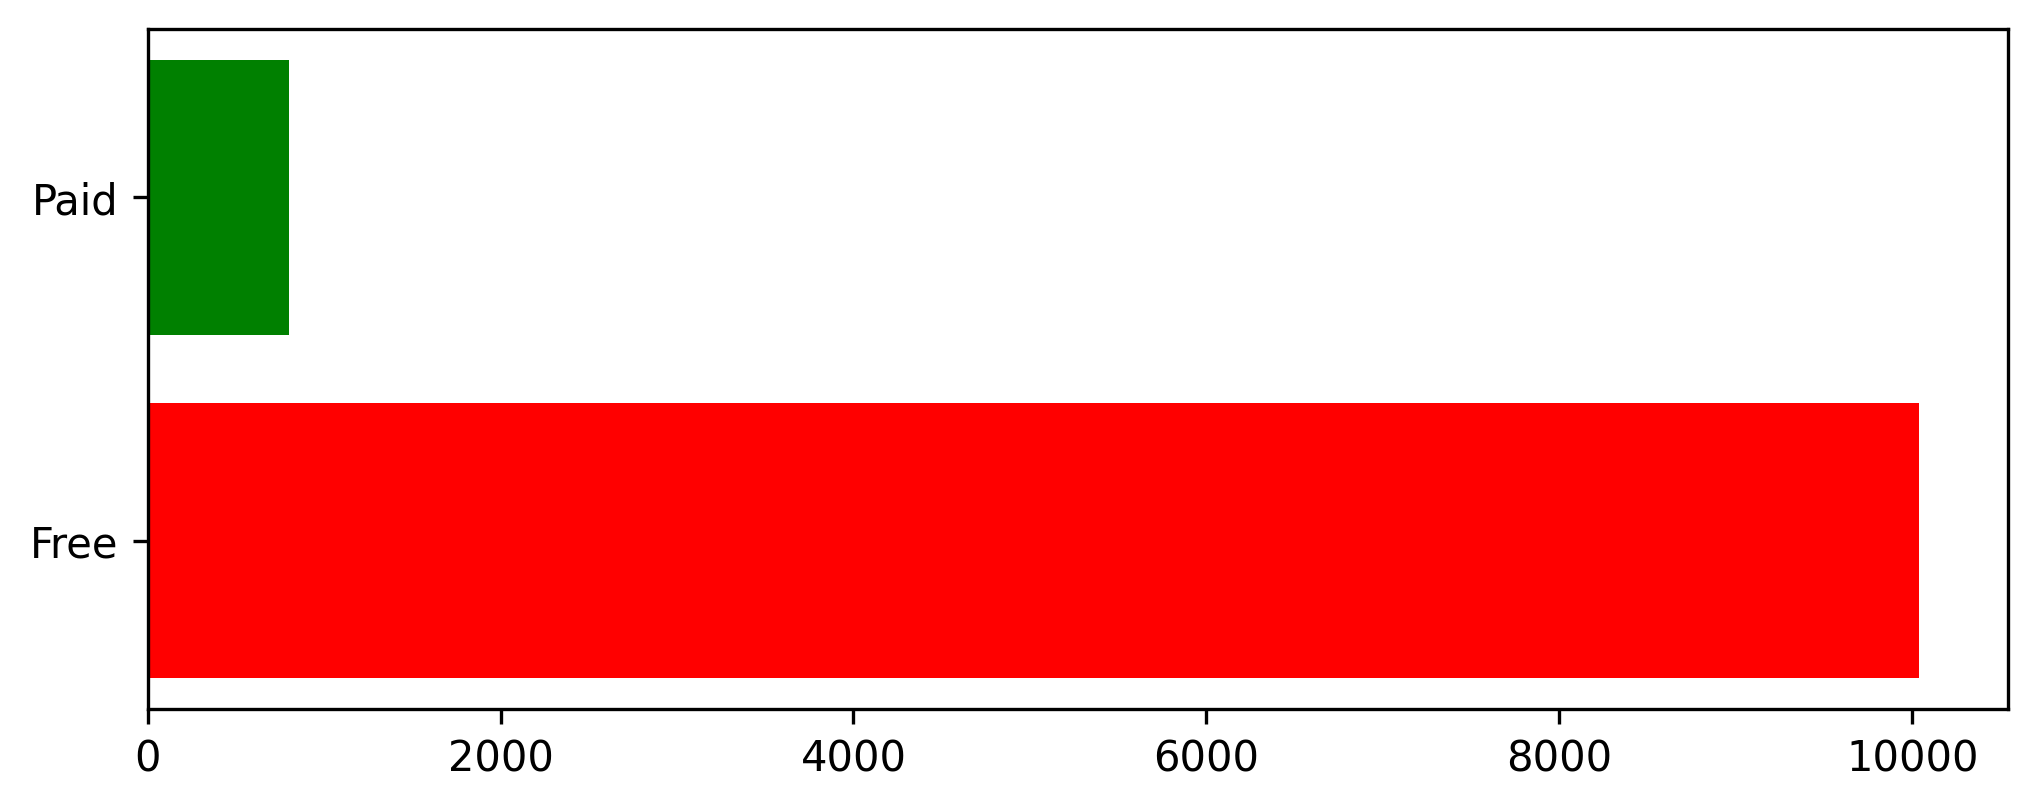

In [210]:
## code here
type_order = df2.groupby('Type').agg({
    'App': 'count'}).rename({'App':'Total'}, axis=1).sort_values('Total',ascending=False).head()

#type_order.plot.barh()

import numpy as np
 
x0 = type_order.reset_index().iloc[0:,0:1].values.tolist() 
x = [sublist[0] for sublist in x0] 
y = type_order.iloc[0:,0:1].stack().values 
 
my_colors = 'rgbkymc'

fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
plt.barh( x , y , color=my_colors)
 
plt.savefig('type_order.png',bbox_inches="tight") 
